# Chapter 3 - Linear Model Estimation

Joshua French

To open this information in an interactive Colab notebook, click the Open in Colab graphic below.

<a href="https://colab.research.google.com/github/jfrench/LinearRegression/blob/master/notebooks/03-linear-model-estimation-notebook.ipynb"> <img src="https://colab.research.google.com/assets/colab-badge.svg"> </a>

------------------------------------------------------------------------

In [1]:
if(!require(palmerpenguins, quietly = TRUE)) {
  install.packages("palmerpenguins", repos = "https://cran.rstudio.com/")
  library(palmerpenguins)
}
if(!require(ggplot2, quietly = TRUE)) {
  install.packages("ggplot2", repos = "https://cran.rstudio.com/")
  library(ggplot2)
}

# A simple motivating example

Suppose you observe data related to the heights (in) of 5 mothers and their adult daughters. The data are in the table below.

| observation | mother | daughter |
|------------:|-------:|---------:|
|           1 |   57.5 |     61.5 |
|           2 |   60.5 |     63.5 |
|           3 |   63.5 |     63.5 |
|           4 |   66.5 |     66.5 |
|           5 |   69.5 |     66.5 |

Would it be reasonable to use a mother’s height to predict the height of her adult daughter? Consider the plot below.

In [2]:
x <- c(57.5, 50.5, 63.5, 66.5, 69.5) # mothers' heights
y <- c(61.5, 63.5, 63.5, 66.5, 66.5) # daughters' heights
plot(y ~ x, pch = 19, xlab = "mother's height (in)", ylab = "daughter's height (in)")

**What is regression?**

------------------------------------------------------------------------

A **regression analysis** is the process of building a model describing the typical relationship between a set of observed variables.

-   A regression analysis builds the model using observed values of the variables for $n$ subjects sampled from a population.
-   In our example, we want to build a **regression** model for the height of adult daughters using their height of their mothers.

**Response versus predictor variables**

------------------------------------------------------------------------

The variables in a regression analysis may be divided into two types:

-   The response variable.
-   The predictor variables.

The outcome variable we are trying to predict is known as the **response variable**.

-   Response variables are also known as **outcome**, **output**, or **dependent** variables.
-   The response variable is denoted by $Y$.
-   $Y_i$ denotes the value of $Y$ for observation $i$.

The variables available to model the response variable are known as **predictors variables**:

-   They are also called **explanatory**, **regressor**, **input**, **independent** variables or simply as **features**.
-   Following the convention of Weisberg (2014), we use the term **regressor** to refer to the variables used in our regression model, whether that is the original predictor variable, some transformation of a predictor, some combination of predictors, etc.
-   Every predictor can be a regressor but not all regressors are a predictor.
-   The regressor variables are denoted as $X_1, X_2, \ldots, X_{p-1}$.
-   $x_{i,j}$ denotes the value of $X_j$ for observation $i$
-   If there is only a single regressor in the model, we can denote the single regressor as $X$ and the observed values of $X$ as $x_1, x_2, \ldots, x_n$.

For the height data, the 5 pairs of observed data are denoted

$$
(x_1, Y_1), (x_2, Y_2), \ldots, (x_5, Y_5),
$$

with $(x_i, Y_i)$ denoting the data for observation $i$.

-   $x_i$ denotes the mother’s height for observation $i$.
-   $Y_i$ denotes the daughter’s height for observation $i$.

**Selecting the best model**

------------------------------------------------------------------------

Suppose we want to find the straight line that best fits the plot of mother and daughter heights.

How do we determine the “best fitting” model?

Consider these potential “best fitting” lines that are drawn on the scatter plot of the height data. Which one is best?

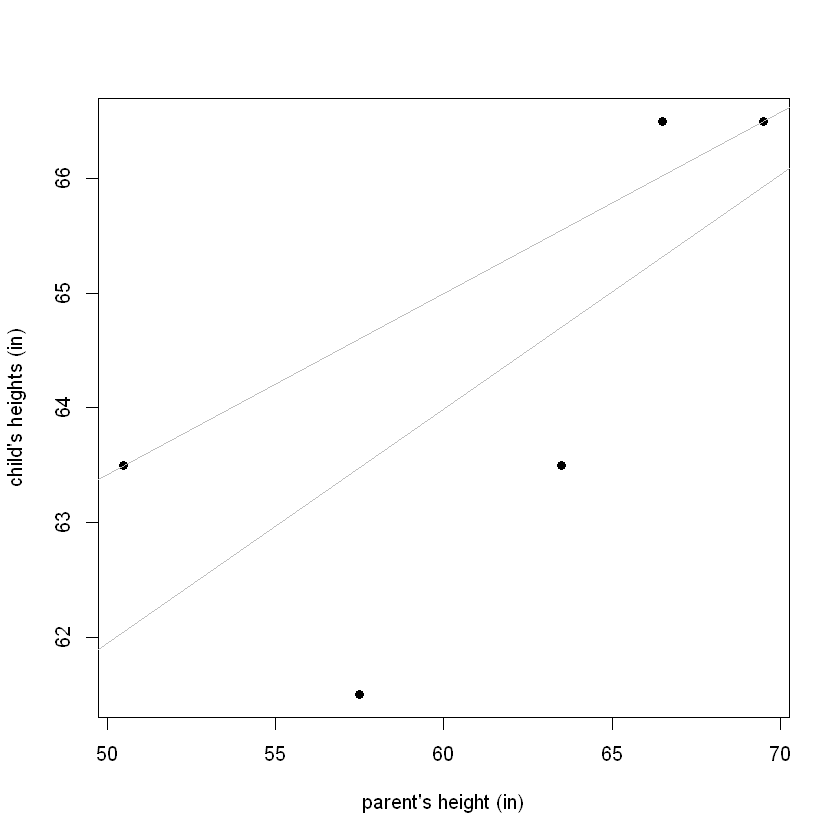

# Estimation of the simple linear regression model

**Parameter estimation** is the process of using observed data to estimate model parameters.

There are many different methods of parameter estimation in statistics:

-   Method-of-moments.
-   Maximum likelihood.
-   Bayesian.
-   Etc.

The most common parameter estimation method for linear models is the **least squares method**, which is commonly called **Ordinary Least Squares (OLS)** estimation.

OLS estimation estimates the regression coefficients with the values that minimize the residual sum of squares (RSS), which we will define shortly.

**Defining a simple linear regression model**

------------------------------------------------------------------------

The regression model for $Y$ as a function of $X$, denoted $E(Y \mid X)$, is the expected value of $Y$ conditional on the regressor $X$.

The **simple linear regression model** for a response variable assumes the mean of $Y$ conditional on a single regressor $X$ is

</br>  
</br>  
</br>

The response variable $Y$ is modeled as

</br>  
</br>  
</br>

where $\epsilon$ is known as the model error.

The error term $\epsilon$ is literally the deviation of the response variable from its mean.

-   We typically assume that conditional on the regressor variable, the error term has mean 0 and variance $\sigma^2$.
-   This is written as $E(\epsilon \mid X) = 0$ and $\mathrm{var}(\epsilon \mid X) = \sigma^2$.

The observed data are modeled as

</br>  
</br>  
</br>

for $i=1$, $2$,$\ldots$,$n$, where $\epsilon_i$ denotes the error for observation $i$.

**Important terminology**

------------------------------------------------------------------------

The **estimated regression model** or **fitted model** is defined as

</br>  
</br>  
</br>

where $\hat{\beta}_0$ and $\hat{\beta}_1$ are the estimated value of our regression parameters.

The $i\text{th}$ **fitted value** is defined as

</br>  
</br>  
</br>

-   The $i\text{th}$ fitted value is the estimated mean of $Y$ when the regressor $X=x_i$.

The $i\text{th}$ **residual** is defined as

</br>  
</br>  
</br>

-   The $i\text{th}$ residual is the difference between the response and estimated mean response of observation $i$.

The **residual sum of squares (RSS)** of a regression model is the sum of its squared residuals. The RSS for a simple linear regression model, as a function of the estimated regression coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, is defined as

</br>  
</br>  
</br>

Using the various objects defined above, there are many equivalent expressions for the RSS.

</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>

The **fitted model** is the estimated model that minimizes the RSS, and is written as

</br>  
</br>  
</br>

-   $\hat{Y}$ is used for brevity.
-   $\hat{E}(Y|X)$ is used for clarity.

In a simple linear regression context, the fitted model is known as the **line of best fit**.

**Visualizing terms**

------------------------------------------------------------------------

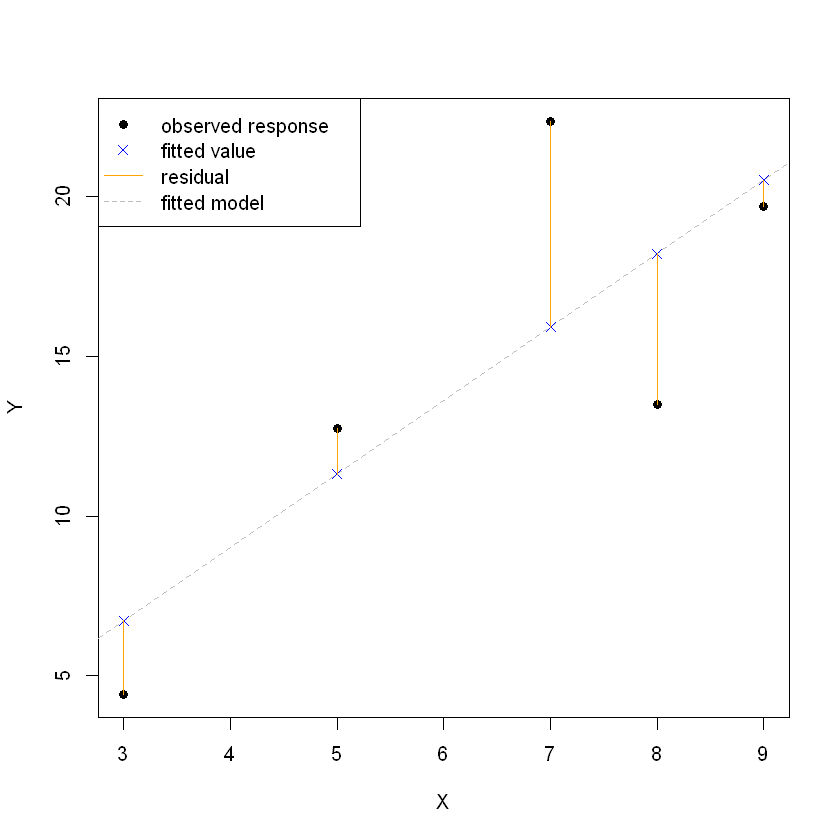

In the graphic above, we visualize the response values, fitted values, residuals, and fitted model in a simple linear regression context. Note that:

-   The fitted model is shown as the dashed grey line and minimizes the RSS.
-   The response values, shown as black dots, are the observed values of $Y$.
-   The fitted values, shown as blue x’s, are the values returned by evaluating the fitted model at the observed regressor values.
-   The residuals, shown as solid orange lines, indicate the distance and direction between the observed responses and their corresponding fitted value. If the response is larger than the fitted value then the residual is positive, otherwise it is negative.
-   The RSS is the sum of the squared vertical distances between the response and fitted values.

**OLS estimators of the simple linear regression parameters**

------------------------------------------------------------------------

The estimators of $\beta_0$ and $\beta_1$ that minimize the RSS for a simple linear regression model can be obtained analytically using basic calculus (as long as $x_1,\ldots,x_n$ are not all equal to the same number).

Define:

-   $\bar{x}=\frac{1}{n}\sum_{i=1}^n x_i$.
-   $\bar{Y} = \frac{1}{n}\sum_{i=1}^n Y_i$.

The OLS estimators of the simple linear regression coefficients that minimize the RSS are

</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>

The most common estimator of the error variance is

</br>  
</br>  
</br>

-   $\mathrm{df}_{RSS}$ is the **degrees of freedom** of the RSS.
-   For simple linear regression, $\mathrm{df}_{RSS}=n-2$.

# Penguins simple linear regression example

The `penguins` data set provides data related to various penguin species measured in the Palmer Archipelago (Antarctica), originally provided by Gorman et al. (2014). We start by loading the data into memory.

In [5]:
data(penguins, package = "palmerpenguins")
head(penguins)

The data set includes 344 observations of 8 variables. The variables are:

-   `species`: a `factor` indicating the penguin species.
-   `island`: a `factor` indicating the island the penguin was observed.
-   `bill_length_mm`: a `numeric` variable indicating the bill length in millimeters.
-   `bill_depth_mm`: a `numeric` variable indicating the bill depth in millimeters.
-   `flipper_length_mm`: an `integer` variable indicating the flipper length in millimeters
-   `body_mass_g`: an `integer` variable indicating the body mass in grams.
-   `sex`: a `factor` indicating the penguin sex (`female`, `male`).
-   `year`: an integer denoting the study year the penguin was observed (`2007`, `2008`, or `2009`).

We begin by creating a scatter plot of `bill_length_mm` versus `body_mass_g`.

In [6]:
plot(bill_length_mm ~ body_mass_g, data = penguins,
     ylab = "bill length (mm)", xlab = "body mass (g)",
     main = "Penguin size measurements")

**Questions:**

-   Is there a positive/negative association between body mass and bill length?
-   Is the relationship approximately linear?

We will build a simple linear regression model that regresses `bill_length_mm` on `body_mass_g`.

We want to estimate the parameters of the model

$$
E(\mathtt{bill\_length\_mm}\mid \mathtt{body\_mass\_g})=\beta_0+\beta_1\,\mathtt{body\_mass\_g}.
$$

The `lm` function uses OLS estimation to fit a linear model to data. The function has two main arguments:

-   `data`: the data frame in which the model variables are stored. This can be omitted if the variables are already stored in memory.
-   `formula`: a Wilkinson and Rogers (1973) style formula describing the linear regression model. For complete details, run `?stats::formula` in the Console. If `y` is the response variable and `x` is an available numeric predictor, then `formula = y ~ x` tells `lm` to fit the simple linear regression model $E(Y|X)=\beta_0+\beta_1 X$.

In [7]:
lmod <- lm(bill_length_mm ~ body_mass_g, data = penguins) # fit model
class(lmod) # class of lmod

The `summary` function is commonly used to summarize the results of our fitted model.

When an `lm` object is supplied to the `summary` function, it returns:

-   `Call`: the function call used to fit the model.
-   `Residuals`: A 5-number summary of the $\hat{\epsilon}_1, \ldots, \hat{\epsilon}_n$.
-   `Coefficients`: A table that lists:
    -   The regressors in the fitted model.
    -   `Estimate`: the estimated coefficient for each regressor.
    -   `Std. Error`: the *estimated* standard error of the estimated coefficients.
    -   `t value`: the computed test statistic associated with testing $H_0: \beta_j = 0$ versus $H_a: \beta_j \neq 0$ for each regression coefficient in the model.
    -   `Pr(>|t|)`: the associated p-value of each test.
-   Various summary statistics:
    -   `Residual standard error` is the value of $\hat{\sigma}$, the estimate of the error standard deviation. The degrees of freedom is $\mathrm{df}_{RSS}$, the number of observations minus the number of estimated coefficients in the model.
    -   `Multiple R-squared` is an estimate of model fit.
    -   `Adjusted R-squared` is a modified version of `Multiple R-squared`.
    -   `F-statistic` is the test statistic for the test that compares the model with an only an intercept to the fitted model. The `DF` (degrees of freedom) values relate to the statistic under the null hypothesis, and the `p-value` is the p-value for the test.

We use the `summary` function on `lmod` to produce the output below.

In [8]:
# summarize results stored in lmod
summary(lmod)

Using the output above, we see that the estimated parameters are $\hat{\beta}_0=26.9$ and $\hat{\beta}_1=0.004$.

Our fitted model is

</br>  
</br>  
</br>

In the context of a simple linear regression model:

-   The intercept term is the expected response when the value of the regressor is zero.
-   The slope is the expected change in the response when the regressor increases by 1 unit.

Thus, based on the model we fit to the `penguins` data, we can make the following interpretations:

</br>  
</br>  
</br>  
</br>  
</br>  
</br>

**Question:**

-   Does the intercept term make sense physically?

The `abline` function can be used to automatically overlay the fitted model on the observed data.

In [9]:
plot(bill_length_mm ~ body_mass_g,
     data = penguins, main = "Penguin size measurements",
     ylab = "bill length (mm)", xlab = "body mass (g)")
# draw fitted line of plot
abline(lmod)

R provides many additional methods (generic functions that do something specific when applied to a certain type of object) for `lm` objects. Commonly used ones include:

We now use some of the methods to extract important characteristics of our fitted model.

We extract the estimated regression coefficients, $\hat{\beta}_0$ and $\hat{\beta}_1$, using the `coef` function.

In [10]:
(coeffs <- coef(lmod)) # extract, assign, and print coefficients

We extract the vector of residuals, $\hat{\epsilon}_1,\ldots, \hat{\epsilon}_n$, using the `residuals` function.

In [11]:
ehat <- residuals(lmod) # extract and assign residuals
head(ehat) # first few residuals

We extract the vector of fitted values, $\hat{Y}_1,\ldots, \hat{Y}_n$, using the `fitted` function.

In [12]:
yhat <- fitted(lmod) # extract and assign fitted values
head(yhat) # first few fitted values

We can also extract the vector of fitted values using the `predict` function.

In [13]:
yhat2 <- predict(lmod) # compute and assign fitted values
head(yhat2) # first few fitted values

We extract the RSS of the model using the `deviance` function.

In [14]:
(rss <- deviance(lmod)) # extract, assign, and print rss

We extract the residual degrees of freedom using the `df.residual` function.

In [15]:
(dfr <- df.residual(lmod)) # extract n - p

We extract the estimated error standard deviation, $\hat{\sigma}=\sqrt{\hat{\sigma}^2}$, using the `sigma` function. In the code below, we square $\hat{\sigma}$ to estimate the error variance, $\hat{\sigma}^2$.

In [16]:
(sigmasqhat <- sigma(lmod)^2) # estimated error variance

**Question:**

-   What are the first three fitted values?
-   What is the RSS of the fitted model?

# Defining a linear model

**Defining terms (again)**

------------------------------------------------------------------------

-   $Y$ denotes the response variable.
    -   The response variable is treated as a random variable.
    -   We will observe realizations of this random variable for each observation in our data set.
-   $X$ denotes a single regressor variable. $X_1, X_2, \ldots, X_{p-1}$ denote distinct regressor variables if we are performing regression with multiple regressor variables.
    -   The regressor variables are treated as non-random variables.
    -   The observed values of the regressor variables are treated as fixed, known values.
-   $\mathbb{X}=\{X_0, X_1,\ldots,X_{p-1}\}$ denotes the collection of all regressors.
    -   $X_0$ is usually the constant regressor 1, which is needed to include an intercept in the regression model.
-   $\beta_0$, $\beta_1$, $\ldots$, $\beta_{p-1}$ denote **regression coefficients**.
    -   Regression coefficients are statistical parameters that we will estimate from our data.
    -   The regression coefficients are treated as fixed, non-random but unknown values.
    -   Regression coefficients are not observable.
-   $\epsilon$ denotes model **error**.
    -   The model error is more accurately described as random variation of each observation from the regression model.
    -   The error is treated as a random variable.
    -   The error is assumed to have mean 0 for all values of the regressors, i.e., $E(\epsilon \mid \mathbb{X}) = 0$.
    -   The variance of the errors is assumed to be a constant value for all values of the regressors, i.e.,$\mathrm{var}(\epsilon \mid \mathbb{X})=\sigma^2$.
    -   The error is never observable (except in the context of a simulation study where the experimenter literally defines the true model).

**Standard definition of linear model**

------------------------------------------------------------------------

In general, a linear regression model can have an arbitrary number of regressors.

A **multiple linear regression** model has two or more regressors.

A **linear model** for $Y$ is defined by the equation

</br>  
</br>  
</br>

Notice:

-   The response value equals the expected response for that combination of regressor values plus some error.
-   $E(Y \mid \mathbb{X}) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_{p-1} X_{p-1}$.

A linear regression model can be written as

$$
E(Y \mid \mathbb{X}) = \sum_{j=0}^{p-1} c_j \beta_j.
$$

-   $c_0, c_1, \ldots, c_{p-1}$ are known functions of the regressor variables.
-   e.g., $c_1 = X_1 X_2 X_3$, $c_3 = X_2^2$, $c_8 = \ln(X_1)/X_2^2$, etc.

Alternatively, if $g_0,\ldots,g_{p-1}$ are functions of $\mathbb{X}$, then a linear regression model can be written as

$$
E(Y\mid \mathbb{X}) = \sum_{j=0}^{p-1} g_j(\mathbb{X})\beta_j.
$$

**Examples of a linear model**

------------------------------------------------------------------------

A model is linear because of its *form* not the shape it produces.

Some examples of linear regression models are:

-   $E(Y|X) = \beta_0$.
-   $E(Y|X) = \beta_0 + \beta_1 X + \beta_2 X^2$.
-   $E(Y|X_1, X_2) = \beta_0 + \beta_1 X_1 + \beta_2 X_2$.
-   $E(Y|X_1, X_2) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2$.
-   $E(Y|X_1, X_2) = \beta_0 + \beta_1 \ln(X_1) + \beta_2 X_2^{-1}$.
-   $E(\ln(Y)|X_1, X_2) = \beta_0 + \beta_1 X_1 + \beta_2 X_2$.
-   $E(Y^{-1}|X_1, X_2) = \beta_0 + \beta_1 X_1 + \beta_2 X_2$.

Some examples of non-linear regression models are:

-   $E(Y|X) = \beta_0 + e^{\beta_1 X}$.
-   $E(Y|X) = \beta_0 + \beta_1 X/(\beta_2 + X)$.

# Estimation of the multiple linear regression model

We want to estimate the parameters of the model

$$
Y=\beta_0 + \beta_1 X_1 + \cdots + \beta_{p-1} X_{p-1} + \epsilon.
$$

The system of equations relating the responses, the regressors, and the errors for all $n$ observations can be written as

$$
Y_i = \beta_0 + \beta_1 x_{i,1} + \beta_2 x_{i,2} + \cdots + \beta_{p-1} x_{i,p-1} + \epsilon_i,\quad i=1,2,\ldots,n.
$$

**Using matrix notation to represent a linear model**

------------------------------------------------------------------------

We can simplify the linear model system of equations using using matrix notation.

We use the following notation:

-   $\mathbf{y} = [Y_1, Y_2, \ldots, Y_n]$ denotes the column vector containing the $n$ observed response values.
-   $\mathbf{X}$ denotes the matrix containing a column of 1s and the observed regressor values for $X_1, X_2, \ldots, X_{p-1}$. This may be written as

$$
\mathbf{X} = \begin{bmatrix}
    1 & x_{1,1} & x_{1,2} & \cdots & x_{1,p-1} \\
    1 & x_{2,1} & x_{2,2} & \cdots & x_{2,p-1} \\
    \vdots & \vdots & \vdots & \vdots & \vdots \\
    1 & x_{n,1} & x_{n,2} & \cdots & x_{n,p-1}
    \end{bmatrix}.
$$

-   $\boldsymbol{\beta} = [\beta_0, \beta_1, \ldots, \beta_{p-1}]$ denotes the column vector containing the $p$ regression coefficients.
-   $\boldsymbol{\epsilon} = [\epsilon_1, \epsilon_2, \ldots, \epsilon_n]$ denotes the column vector contained the $n$ errors.

The system of equations defining the linear model in can be written as

</br>  
</br>  
</br>

**Matrix definitions of residuals, fitted values, and RSS\* for multiple linear regression**

------------------------------------------------------------------------

The vector of estimated values for the coefficients contained in $\boldsymbol{\beta}$ is denoted

</br>  
</br>  
</br>

The vector of regressor values for the $i\text{th}$ observation is denoted

</br>  
</br>  
</br>

**Question:**

-   Why do we include a $1$ in our vector?

The $i\text{th}$ **fitted value** in the context of multiple linear regression is defined as

</br>  
</br>  
</br>

The notation “$\mathbb{X} = \mathbf{x}_i$” is a concise way of saying “$X_0 = 1, X_1=x_{i,1}, \ldots, X_{p-1}=x_{i,p-1}$”.

The column vector of fitted values is defined as

$$
\begin{aligned}
\hat{\mathbf{y}} &= [\hat{Y}_1,\ldots,\hat{Y}_n] \\
&= \mathbf{X}\hat{\boldsymbol{\beta}}.
\end{aligned}
$$

The $i\text{th}$ **residual** in the context of multiple linear regression can be written as

</br>  
</br>  
</br>

The column vector of residuals is defined as $$
\hat{\boldsymbol{\epsilon}} = [\hat{\epsilon}_1,\ldots,\hat{\epsilon}_n]. $$

Equivalent expressions for the residual vector are

</br>  
</br>  
</br>

The RSS for a multiple linear regression model, as a function of the estimated regression coefficients, is

</br>  
</br>  
</br>  
</br>  
</br>  
</br>

**OLS estimator in matrix form**

------------------------------------------------------------------------

The OLS estimator of the regression coefficient vector, $\boldsymbol{\beta}$, is

</br>  
</br>  
</br>

This solution for $\hat{\boldsymbol{\beta}}$ assumes $\mathbf{X}$ has full-rank ($n>p$ and none of the columns of $\mathbf{X}$ are linear combinations of other columns in $\mathbf{X}$).

The general estimator of the $\sigma^2$ in the context of multiple linear regression is

</br>  
</br>  
</br>

# Penguins multiple linear regression example

We will fit a multiple linear regression model regressing `bill_length_mm` on `body_mass_g` and `flipper_length_mm`, and will once again do so using the `lm` function.

**Formula notation**

------------------------------------------------------------------------

Before we do that, we provide some additional discussion of the of the `formula` argument of the `lm` function. This will be very important as we discuss more complicated models. Assume `y` is the response variable and `x`, `x1`, `x2`, `x3` are available numeric predictors. Then:

-   `y ~ x` describes the simple linear regression model $E(Y|X)=\beta_0+\beta_1 X$.
-   `y ~ x1 + x2` describes the multiple linear regression model $E(Y|X_1, X_2)=\beta_0+\beta_1 X_1 + \beta_2 X_2$.
-   `y ~ x1 + x2 + x1:x2` and `y ~ x1 * x2` describe the multiple linear regression model $E(Y|X_1, X_2)=\beta_0+\beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2$.
-   `y ~ -1 + x1 + x2` describe a multiple linear regression model without an intercept, in this case, $E(Y|X_1, X_2)=\beta_1 X_1 + \beta_2 X_2$. The `-1` tells R not to include an intercept in the fitted model.
-   `y ~ x + I(x^2)` describe the multiple linear regression model $E(Y|X)=\beta_0+\beta_1 X + \beta_2 X^2$. The `I()` function is a special function that tells R to create a regressor based on the syntax inside the `()` and include that regressor in the model.

**Fitting a model**

------------------------------------------------------------------------

We fit the linear model regressing `bill_length_mm` on `body_mass_g` and `flipper_length_mm` and extract some statistics.

In [17]:
# fit model
mlmod <- lm(bill_length_mm ~ body_mass_g + flipper_length_mm, data = penguins)
# extract estimated coefficients
coef(mlmod)
# extract RSS
deviance(mlmod)

The fitted model is

</br>  
</br>  
</br>

-   **Question:** What is the RSS? How does it compare to the simple linear regression model we used before?

# Types of linear models

-   **Simple**: a model with an intercept and a single regressor.
-   **Multiple**: a model with 2 or more regressors.
-   **Polynomial**: a model with squared, cubic, quartic predictors, etc.
    -   E.g, $E(Y\mid X) = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3$ is a 4th-degree polynomial.
-   **First-order**: a model in which each predictor is used to create no more than one regressor.
-   **Main effect**: a model in which none of the regressors are functions of more than one predictor. A predictor can be used more than once, but each regressor is only a function of one predictor.
    -   E.g., if $X_1$ and $X_2$ are different predictors, then the regression model $E(Y\mid X_1, X_2) = \beta_0 + \beta_1 X_1 + \beta_2 X_1^2 + \beta_3 X_2$ would be a main effect model, but not a first-order model since $X_1$ was used to create two regressors.
-   **Interaction**: a model in which some of the regressors are functions of more than 1 predictor.
    -   E.g., if $X_1$ and $X_2$ are different predictors, then the regression model $E(Y\mid X_1, X_2) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1X_2$ is a very simple interaction model since the third regressor is the product of $X_1$ and $X_2$.
-   **Analysis of variance (ANOVA)**: a model for which all predictors used in the model are categorical.
-   **Analysis of covariance (ANCOVA)**: a model that uses at least one numeric predictor and at least one categorical predictor.
-   **Generalized (GLM)**: a “generalized” linear regression model in which the responses do not come from a normal distribution.

# Categorical predictors

Categorical predictors can greatly improve the explanatory power or predictive capability of a fitted model when different patterns exist for different levels of the variables.

We discuss two basic linear regression models that have categorical predictors:

-   **Parallel lines regression model**: a main effect regression model that has a single numeric regressor and a single categorical predictor.
    -   The model produces parallel lines for each level of the categorical variable.
-   **Separate lines regression model**, which adds an interaction term between the numeric regressor and categorical predictor of the parallel lines regression model.
    -   The model produces separate lines for each level of the categorical variable.

**Indicator variables**

------------------------------------------------------------------------

In order to compute $\hat{\boldsymbol{\beta}}$ both $\mathbf{X}$ and $\mathbf{y}$ must contain numeric values.

How can we use a categorical predictor in our regression model when its values are not numeric?

We must transform the categorical predictor into one or more **indicator** or **dummy variables**.

An **indicator function** is a function that takes the value 1 if a certain property is true and 0 otherwise.

An **indicator variable** is the variable that results from applying an indicator function to each observation of a variable.

We denote indicator functions using the notation,

$$
I_S(x) =
\begin{cases}
1 & \textrm{if}\;x \in S\\
0 & \textrm{if}\;x \notin S
\end{cases}.
$$

-   This function returns 1 if $x$ is in the set $S$ and 0 otherwise.

Some examples of indicator functions:

-   $I_{\{2,3\}}(2) = 1$.
-   $I_{\{2,3\}}(2.5) = 1$.
-   $I_{[2,3]}(2.5) = 1$, where $[2,3]$ is the interval from 2 to 3 and not the set containing only the numbers 2 and 3.
-   $I_{\{\text{red},\text{green}\}}(\text{green}) = 1$.

Let $C$ denote a categorical predictor with levels $L_1$ and $L_2$.

-   $C$ stands for “categorical”.
-   $L$ stands for “level”.
-   $c_i$ denotes the value of $C$ for observation $i$.

Let $D_j$ denote the indicator (dummy) variable for factor level $L_j$ of $C$.

-   The value of $D_j$ for observation $i$ is denoted $d_{i,j}$, with

$$
d_{i,j} = I_{\{L_j\}}(c_i).
$$

-   $d_{i,j}$ is 1 if $c_i$ has factor level $L_j$ and 0 otherwise.

**Parallel and separate lines models**

------------------------------------------------------------------------

Assume we want to build a linear regression model using a single numeric regressor $X$ and a two-level categorical predictor $C$.

The standard simple linear regression model is

$$
E(Y\mid X)=\beta_0 + \beta_1 X.
$$

The parallel lines regression model is

$$
E(Y\mid X,C)=\beta_{0}+\beta_1 X+\beta_2 D_2.
$$

Since $D_2=0$ when $C=L_1$ and $D_2=1$ when $C=L_2$,this model simplifies to

$$
E(Y\mid X, C) =
\begin{cases}
  \beta_0+\beta_1 X & \mathrm{if}\;C = L_1 \\
  (\beta_0 + \beta_2) +\beta_1 X & \mathrm{if}\;C = L_2.
\end{cases}
$$

-   **Question:** What will the vertical distance between the lines be?

The separate lines regression model is

$$
E(Y\mid X,C)=\beta_0+\beta_1 X+\beta_2 D_2 + \beta_{3} XD_2.
$$

This model simplifies to

$$
E(Y\mid X, C) =
\begin{cases}
  \beta_{0}+\beta_1 X & \mathrm{if}\;C = L_1 \\
  (\beta_{0} + \beta_{2}) +(\beta_1 + \beta_{3}) X & \mathrm{if}\;C = L_2.
\end{cases}
$$

**More complex models with categorical predictors**

------------------------------------------------------------------------

If you had a categorical predictor $C$ with $K$ levels $L_1, L_2, \ldots, L_K$:

-   We can add indicator variables $D_2, D_3, \ldots, D_K$ to a simple linear regression model to create a parallel lines model for each level of $C$.
-   We can add regressors $D_2, D_3, \ldots, D_K, X D_2, X D_3, \ldots, X D_K$ to a simple linear regression model to create a separate lines model for each level of $C$.

It is easy to imagine using multiple categorical predictors in a model, interacting one or more categorical predictors with one or more numeric regressors in model, etc.

These models can be fit easily using R but are more difficult to interpret.

**Avoiding collinearity**

------------------------------------------------------------------------

Consider the setting where $C$ has only 2 levels.

Why don’t we add $D_1$ to the parallel lines model that already has $D_2$? Or $D_1$ and $D_1 X$ to the separate lines model that already has $D_2$ and $D_2 X$?

-   We don’t *need* to add them.
    -   If an observation doesn’t have level $L_2$ ($D_2=0$), then it must have level $L_1$.
-   To avoid linear dependencies in the columns of the regressor matrix $\mathbf{X}$!

Consider a categorical variable $C$ with two only levels $L_1$ and $L_2$.

-   Let $\mathbf{d}_1=[d_{1,1}, d_{2,1}, \ldots, d_{n,1}]$ denote the column vector of observed values for indicator variable $D_1$.
-   Let $\mathbf{d}_2$ be the column vector for $D_2$.
-   Then $\mathbf{d}_1 + \mathbf{d}_2$ is an $n\times 1$ vector of 1s.
-   $D_1$ and $D_2$ will be linearly dependent with the intercept column of our $\mathbf{X}$ matrix, which creates estimation problems.

For a categorical predictor with $K$ levels, we only need indicator variables for $K-1$ levels of the categorical predictor.

-   The level without an indicator variable in the regression model is known as the **reference level**.
-   R automatically chooses the first level of a categorical (`factor`) variable to be the reference level, so we adopt that convention.

# Penguins example with categorical predictor

We display the grouped scatter plot of `bill_length_mm` versus `body_mass_g` that distinguishes the `species` of each observation.

In [18]:
library(ggplot2) # load package
# create grouped scatterplot
ggplot(data = penguins) +
  geom_point(aes(x = body_mass_g, y = bill_length_mm, shape = species, color = species)) +
  xlab("body mass (g)") + ylab("bill length (mm)")

**Question:**

-   Does the relationship between bill length and body mass change depending on the species of penguin?

**Using a categorical variable in the `lm` function**

------------------------------------------------------------------------

How do you use a categorical variable in R’s `lm` function?

-   Each categorical variables should be a `factor`.
-   The `lm` function will automatically convert a `factor` variable to the correct number of indicator variables when you include the `factor` variable in your `formula` argument.
-   To add a main effect term for a categorical predictor, we simply add the term to our `lm` formula.
-   To create an interaction term, we use `:` between the interacting variables.
    -   E.g., if `c` is a `factor` variable and `x` is a `numeric` variable, you can use the notation `c:x` in your `formula` to get all the interactions between `c` and `x`.

Our categorical predictor `species` has the levels `Adelie`, `Chinstrap`, and `Gentoo`.

-   The first level of species is `Adelie`, so R will treat that level as the reference level.
-   R will automatically create indicator variables for the levels `Chinstrap` and `Gentoo`.

Let $D_C$ denote the indicator variable for the `Chinstrap` level and $D_G$ denote the indicator variable for the `Gentoo` level.

**Fitting a parallel lines model**

------------------------------------------------------------------------

We fit the parallel lines regression model $$
E(\mathtt{bill\_length\_mm} \mid \mathtt{body\_mass\_g}, \mathtt{species}) = \beta_{0} + \beta_1 \mathtt{body\_mass\_g} + \beta_2 D_C + \beta_3 D_G.
$$

In [19]:
# fit parallel lines model
lmodp <- lm(bill_length_mm ~ body_mass_g + species, data = penguins)
# extract coefficients
coef(lmodp)

The fitted parallel lines model is

</br>  
</br>  
</br>

Note that $D_C$ is `speciesChinstrap` and $D_G$ is `speciesGentoo`.

When an observation has `species` level `Adelie`, then the model simplifies to

</br>  
</br>  
</br>

When an observation has `species` level `Chinstrap`, then the model simplifies to

</br>  
</br>  
</br>

When an observation has `species` level `Gentoo`, then the model simplifies to

</br>  
</br>  
</br>

We add our fitted lines for each `species` to our scatter plot.

Let’s try adding our fitted values to the `penguins` data frame.

-   We use the `predict` function to obtained the fitted values of our fitted model.
-   We use the `transform` function to add those values as the `pl_fitted` variable in the `penguins` data frame.

In [20]:
penguins <-
  penguins |>
  transform(pl_fitted = predict(lmodp))

-   **Question:** Why are we getting this error?

To handle this error, we refit our model while setting the `na.action` argument to `na.exclude`. As stated Details section of the documentation for the `lm` function (run `?lm` in the Console):

> $\ldots$ when `na.exclude` is used the residuals and predictions are padded to the correct length by inserting `NA`s for cases omitted by `na.exclude`.

We refit the parallel lines model below with `na.action = na.exclude` and then repeat what we did before.

In [21]:
# refit parallel lines model with new na.action behavior
lmodp <- lm(bill_length_mm ~ body_mass_g + species,
            data = penguins, na.action = na.exclude)
# add fitted values to penguins data frame
penguins <-
  penguins |>
  transform(pl_fitted = predict(lmodp))

We now use the `geom_line` function to add the fitted lines for each `species` level to our scatter plot.

In [22]:
# create plot
# create scatterplot
# customize labels
# add lines for each level of species
ggplot(data = penguins) +
  geom_point(aes(x = body_mass_g, y = bill_length_mm,
                 shape = species, color = species)) +
  xlab("body mass (g)") + ylab("bill length (mm)") +
  geom_line(aes(x = body_mass_g, y = pl_fitted, color = species))

**Fitting a separate lines model**

------------------------------------------------------------------------

We now fit the separate lines regression model

$$
\begin{aligned}
&E(\mathtt{bill\_length\_mm} \mid \mathtt{body\_mass\_g}, \mathtt{species}) \\
&= \beta_{0} + \beta_1 \mathtt{body\_mass\_g} + \beta_2 D_C + \beta_3 D_G + \beta_4 \mathtt{body\_mass\_g} D_C + \beta_5 \mathtt{body\_mass\_g} D_G.
\end{aligned}
$$

In [23]:
# fit separate lines model
# na.omit = na.exclude used to change predict behavior
lmods <- lm(bill_length_mm ~ body_mass_g + species + body_mass_g:species,
            data = penguins, na.action = na.exclude)
# extract estimated coefficients
coef(lmods)

The fitted separate lines model is

</br>  
</br>  
</br>

When an observation has `species` level `Adelie`, then the model simplifies to

</br>  
</br>  
</br>

When an observation has `species` level `Gentoo`, the model simplifies to

</br>  
</br>  
</br>

We use the code below to display the fitted lines for the separate lines model on the `penguins` data.

In [24]:
# add separate lines fitted values to penguins data frame
penguins <-
  penguins |>
  transform(sl_fitted = predict(lmods))
# use geom_line to add fitted lines to plot
ggplot(data = penguins) +
  geom_point(aes(x = body_mass_g, y = bill_length_mm, shape = species, color = species)) +
  xlab("body mass (g)") + ylab("bill length (mm)") +
  geom_line(aes(x = body_mass_g, y = sl_fitted, col = species))

**Question:**

-   Do the fitted lines match the observed data behavior reasonably well?

# Evaluating model fit

**The coefficient of determination**

------------------------------------------------------------------------

The most basic statistic measuring the fit of a regression model is the **coefficient of determination**, which is defined as

$$
R^2 = 1 - \frac{\sum_{i=1}^n (Y_i-\hat{Y}_i)^2}{\sum_{i=1}^n (Y_i-\bar{Y})^2},
$$

where $\bar{Y}$ is the sample mean of the observed response values.

**Some sum-of-squares statistics**

------------------------------------------------------------------------

To interpret this statistic, we need to introduce some new “sum-of-squares” statistics similar to the RSS.

The **total sum of squares** (corrected for the mean) is computed as

$$
TSS = \sum_{i=1}^n(Y_i-\bar{Y})^2.
$$

-   The TSS is the sum of the squared deviations of the response values from the sample mean.
-   It has a more insightful interpretation.

Consider the **constant mean model**, which is the model

$$
E(Y)=\beta_0.
$$

Using basic calculus, we can show that the OLS estimator of $\beta_0$ for the constant mean model is $\hat{\beta}_0=\bar{Y}$.

For the constant mean model:

-   $\hat{Y}_i=\hat{\beta}_0$ for $i=1,2,\ldots,n$.
-   The RSS of the constant mean model is $\sum_{i=1}^n(Y_i-\hat{Y}_i)^2=\sum_{i=1}^n(Y_i-\bar{Y})^2$.

*The TSS is the RSS for the constant mean model*.

The **regression sum-of-squares** or **model sum-of-squares** is defined as

$$
SS_{reg} = \sum_{i=1}^n(\hat{Y}_i-\bar{Y})^2.
$$

-   SS<sub>reg</sub> is the sum of the squared deviations between the fitted values of a model and the fitted values of the constant mean model.

We have the following relationship between TSS, RSS, and SS<sub>reg</sub>:

$$
TSS = RSS + SS_{reg}.
$$

$SS_{reg}=TSS-RSS$.

-   SS<sub>reg</sub> measures the reduction in RSS when comparing the fitted model to the constant mean model.

**Equivalent expressiongs for $R^2$**

------------------------------------------------------------------------

Some equivalent expressions for $R^2$ are

</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>

The last expression is the squared sample correlation between the observed and fitted values, and is a helpful way to express the coefficient of determination because it extends to regression models that are not linear.

*The coefficient of determination is the proportional reduction in RSS when comparing the fitted model to the constant mean model*.

**Comments about the coefficient of determination**

------------------------------------------------------------------------

-   $0\leq R^2 \leq 1$.
-   $R^2=0$ for the constant mean model.
-   $R^2=1$ for a fitted model that perfectly fits the data (the fitted values match the observed response values).
-   Generally, larger values of $R^2$ suggest that the model explains a lot of the variation in the response variable.
-   Smaller $R^2$ values suggest the fitted model does not explain a lot of the response variation.
-   The `Multiple R-squared` value printed by the `summary` of an `lm` object is $R^2$.
-   To extract $R^2$ from a fitted model, you can use the syntax `summary(lmod)$r.squared`, where `lmod` is your fitted model.

**Examples of $R^2$**

------------------------------------------------------------------------

Consider the examples below relating $R^2$ to various fitted simple linear regression models.

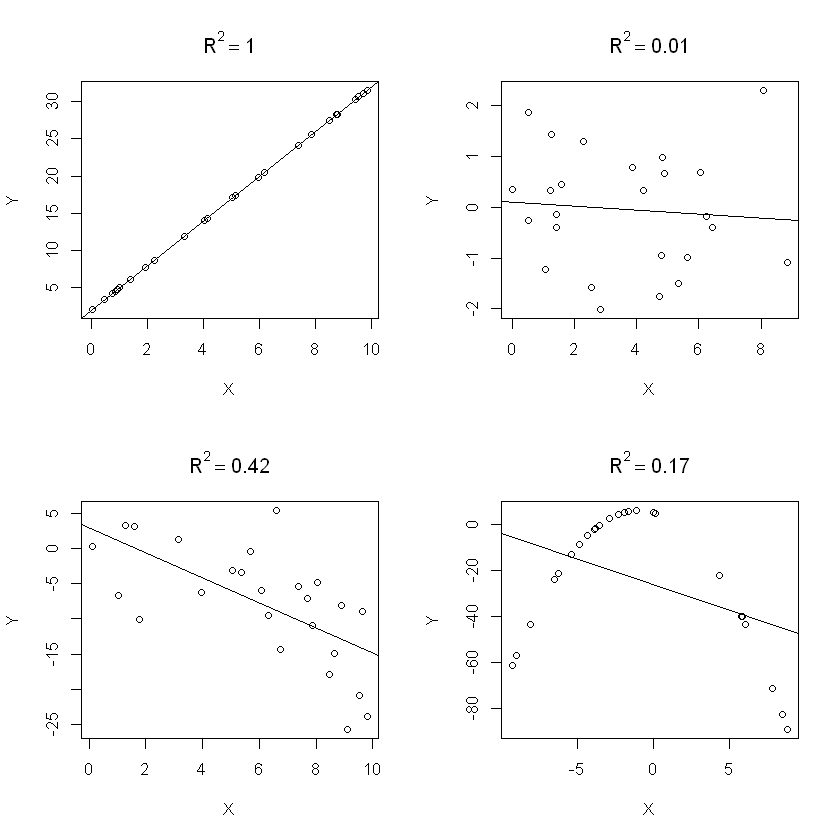

The coefficient of determination for the parallel lines model fit to the `penguins` data is 0.81.

In [26]:
summary(lmodp)$r.squared

By adding the `body_mass_g` regressor and `species` predictor to the constant mean model of `bill_length_mm`, we reduced the RSS by 81%.

**Cautions about $R^2$**

------------------------------------------------------------------------

It is not wise to use $R^2$ to choose between models:

-   $R^2$ never decreases as regressors are added to an existing model.
    -   We can increase $R^2$ by simply adding regressors to your existing model, even if they are non-sensical.
-   $R^2$ doesn’t tell you whether a model adequately describes the pattern of the observed data.
    -   $R^2$ is a useful statistic for measuring model fit when there is approximately a linear relationship between the response values and fitted values.

Let’s add some noise as a regressor to our parallel lines model.

In [27]:
set.seed(28) # for reproducibility
# create regressor of random noise
noisyx <- rnorm(344)
# add noisyx as regressor to lmodp
lmod_silly <- update(lmodp, . ~ . + noisyx)
# extract R^2 from fitted model
summary(lmod_silly)$r.squared

The $R^2$ value increased from 0.8080 to 0.8088!

**Anscombe’s Quartet**

------------------------------------------------------------------------

Anscombe (1973) provides a canonical data set known as “Anscombe’s quartet” that illustrates how $R^2$ can mislead you into thinking an inappropriate model fits better than it actually does.

-   The data set is comprised of 4 different data sets.
-   When a simple linear regression model is fit to each data set:
    -   $\hat{\beta}_0=3$.
    -   $\hat{\beta}_1=0.5$.
    -   $R^2=0.67$.

Anscombe’s quartet is available as the `anscombe` data set in the **datasets** package. The data set includes 11 observations of 8 variables. The variables are:

-   `x1`, `x2`, `x3`, `x4`: the regressor variable for each individual data set.
-   `y1`, `y2`, `y3`, `y4`: the response variable for each individual data set.

We fit a simple linear regression model to each of the 4 data sets.

In [28]:
# fit model to first data set
lmod_a1 <- lm(y1 ~ x1, data = anscombe)
# fit model to second data set
lmod_a2 <- lm(y2 ~ x2, data = anscombe)
# fit model to third data set
lmod_a3 <- lm(y3 ~ x3, data = anscombe)
# fit model to fourth data set
lmod_a4 <- lm(y4 ~ x4, data = anscombe)

We extract the estimated coefficients from each fitted model to confirm that the estimated coefficients are nearly identical.

In [29]:
coef(lmod_a1)

In [30]:
coef(lmod_a2)

In [31]:
coef(lmod_a3)

In [32]:
coef(lmod_a4)

We extract $R^2$ from each fitted model to confirm that they are nearly identical.

In [33]:
summary(lmod_a1)$r.squared

In [34]:
summary(lmod_a2)$r.squared

In [35]:
summary(lmod_a3)$r.squared

In [36]:
summary(lmod_a4)$r.squared

We overlay the fitted models on each data set.

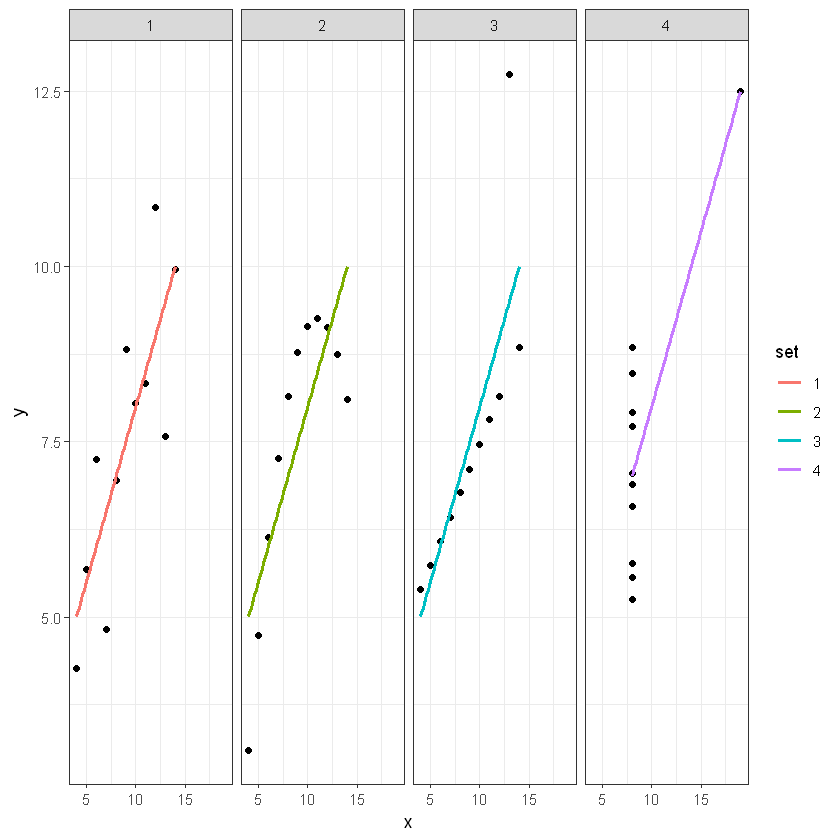

**Question?**

-   Do all models describe the data equally well?
-   If not, comment on the deficiencies of the poorly fitting models.

**Adjusted R-squared**

------------------------------------------------------------------------

Ezekiel (1930) proposed the adjusted R-squared statistic as a better statistic for measuring model fit. The adjusted $R^2$ statistic is defined as

$$
R^2_a=1-(1-R^2)\frac{n-1}{n-p}=1-\frac{RSS/(n-p)}{TSS/(n-1)}.
$$

-   $R^2_a$ will only increase when a regressors substantively improves the fit of the model to the observed data.
-   We favor models with larger values of $R^2_a$.

What is the $R^2_a$ for the 4 models we previously fit to the `penguins` data? Which is the “best” model?

In [38]:
# simple linear regression model
summary(lmod)$adj.r.squared
# multiple linear regression model
summary(mlmod)$adj.r.squared
# parallel lines model
summary(lmodp)$adj.r.squared
# separate lines model
summary(lmods)$adj.r.squared

We double-check that the separate lines model is a sensible model.

In [39]:
plot(penguins$bill_length_mm ~ fitted(lmods),
     xlab = "fitted values", ylab = "bill length (mm)")
abline(0, 1) # add 45 degree line

# Summary of terms

An overview of terms used to define a linear model.

| Term                    | Description                                                                 | Observable? | Random? |
|:--------------|:-------------------------------------------|:-------|:-----|
| $Y$                     | response variable                                                           | Yes         | Yes     |
| $Y_i$                   | response value for the $i\text{th}$ observation                             | Yes         | Yes     |
| $\mathbf{y}$            | the $n\times 1$ column vector of response values                            | Yes         | Yes     |
| $X$                     | regressor variable                                                          | Yes         | No      |
| $X_j$                   | the $j$th regressor variable                                                | Yes         | No      |
| $x_{i,j}$               | the value of the $j$th regressor variable for the $i\text{th}$ observation  | Yes         | No      |
| $\mathbf{X}$            | the $n\times p$ matrix of regressor values                                  | Yes         | No      |
| $\mathbf{x}_i$          | the $p\times 1$ vector of regressor values for the $i\text{th}$ observation | Yes         | No      |
| $\beta_j$               | the coefficient associated with the $j$th regressor variable                | No          | No      |
| $\boldsymbol{\beta}$    | the $p\times 1$ column vector of regression coefficients                    | No          | No      |
| $\epsilon$              | the model error                                                             | No          | Yes     |
| $\epsilon_i$            | the error for the $i\text{th}$ observation                                  | No          | Yes     |
| $\boldsymbol{\epsilon}$ | the $n\times 1$ column vector of errors                                     | No          | Yes     |

# Summary of functions

An overview of important functions discussed in this chapter.

| Function    | Purpose                                                                        |
|:----------|:------------------------------------------------------------|
| `lm`        | Fits a linear model based on a provided `formula`                              |
| `summary`   | Provides summary information about the fitted model                            |
| `coef`      | Extracts the vector of estimated regression coefficients from the fitted model |
| `residuals` | Extracts the vector of residuals from the fitted model                         |
| `fitted`    | Extracts the vector of fitted values from the fitted model                     |
| `predict`   | Computes the fitted values (or arbitrary predictions) based on a fitted model  |
| `deviance`  | Extracts the RSS of a fitted model                                             |
| `sigma`     | Extracts $\hat{\sigma}$ from the fitted model                                  |
| `update`    | Updates a fitted model to remove or add regressors                             |

# Going Deeper

## Derivation of the OLS estimators of the simple linear regression model coefficients

Assume a simple linear regression model with $n$ observations.

The residual sum of squares for the simple linear regression model is

</br>  
</br>  
</br>

**OLS estimator of $\beta_0$**

First, we take the partial derivative of the RSS with respect to $\hat\beta_0$ and simplify.

</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>

**OLS Estimator of $\beta_1$**

We start by taking the partial derivative of the RSS with respect to $\hat{\beta}_1$ and simplify.

</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>

## Unbiasedness of OLS estimators

We now show that the OLS estimators of the simple linear regression coefficients are unbiased.

An estimator is unbiased if the expected value is equal to the parameter it is estimating.

We want to show that

$$
E(\hat{\beta}_0\mid \mathbf{X})=\beta_0.
$$

</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>

## Derivation of the OLS estimator for the multiple linear regression model coefficients

</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>  
</br>

# References

Anscombe, Francis J. 1973. “Graphs in Statistical Analysis.” The American Statistician 27 (1): 17–21.

Ezekiel, Mordecai. 1930. “Methods of Correlation Analysis.”

Gorman, Kristen B., Tony D. Williams, and William R. Fraser. 2014. “Ecological Sexual Dimorphism and Environmental Variability Within a Community of Antarctic Penguins (Genus Pygoscelis).” PLOS ONE 9 (3): 1–14. <https://doi.org/10.1371/journal.pone.0090081>.

Weisberg, Sanford. 2014. Applied Linear Regression. Fourth. Hoboken NJ: Wiley. <http://z.umn.edu/alr4ed>.

Wilkinson, GN, and CE Rogers. 1973. “Symbolic Description of Factorial Models for Analysis of Variance.” Journal of the Royal Statistical Society: Series C (Applied Statistics) 22 (3): 392–99.